# Perceptrón multicapa

Consideraremos un perceptrón multicapa, con capas enumeradas por $l=0,1,...,L$.
Denotemos por $x^l_i$ el estado de la $i$-ésima neurona en la capa $l$.
Diremos que la red posee $n^l$ neuronas $i=1,...,n^l$ en la $l$-ésima capa.
En particular, $x^0$ denota el vector de estados de la capa de entrada y $x^L$ el vector de estados de la capa de salida.
Se tiene que

$$ \begin{align}
x^l_i
=
g(h^l_i)
\;\;\;\;\;\;\;\; (1)
\end{align} $$

donde $g:\mathbb{R}\to \mathbb{R}$ es una función de activación, por ejemplo una sigmoide $g(h)=1/(1+e^{-h})$, y

$$ \begin{align}
h^{l}_i
=
\sum_j w^{l}_{ij} x^{l-1}_j
\;\;\;\;\;\;\;\; (2)
\end{align} $$
es el campo local sufrido por la $i$-ésima neurona en la $l$-ésima capa .
Además, $w^l_{ij}$ denota la intensidad de la sinapsis que conecta la $j$-ésima neurona en la $(l-1)$-ésima capa con la $i$-ésima neurona en la $l$-ésima capa.
Notar, la red depende de las matrices de pesos sinápticos $w^1,w^2,...,w^{L}$.

## Umbrales de activación

En cada una de las capas $l=0,1,...,L-1$, se agrega una neurona extra $i=n^l+1$ con un estado fijo $x^l_{n^l+1}=-1$.
De esta manera, una nueva sinapsis $u^{l}_i:=w^{l}_{i,n^{l-1}+1}$ hace las veces de umbral de activación de la $i$-ésima neurona en la $l$-ésima capa, ya que
$$ \begin{align}
h^{l+1}_i
=
w^{l+1}_{i,n^{l}+1} x^{l}_{n^{l}+1}
+
\sum_{j=1}^{n^l} w^{l+1}_{ij} x^{l}_j
=
-
u^{l+1}_i
+
\sum_{j=1}^{n^l} w^{l+1}_{ij} x^l_j
\;\;\;\;\;\;\;\; (3)
\end{align} $$

## Conjunto de entrenamiento

Los datos de entrenamiento consisten en un conjunto de pares $\{(e^m,s^m):m=1,...,M\}$ donde $e^m\in \mathbb{R}^{n_0}$ y $s^m\in \mathbb{R}^{n_L}$ son vectores que representan el $m$-ésimo par de entrada-salida o *ejemplo* que debe aprender la red.

## Función costo: el Error Cuadrático

Si pensamos que la salida de la red es una función de la entrada, i.e. que $x^L(x^0)$, podemos evaluar el error que comete la red sobre el conjunto de entramiento utilizando el *error cuadrático*
$$
E
=
\sum_{m=1}^M F^m
$$
como *función costo*, donde
$$
F^m
=
\frac{1}{2}
\sum_{i=1}^{n^L}
(x^L_i(x^0=e^m) - s^m_i)^2
$$
es el error cuadrático que comete la red sobre el $m$-ésimo ejemplo.

## Entrenamiento: descenso por el gradiente

Entrenar la red consisten en encontrar valores de los pesos sinápticos $w^l_{ij}$ que minimicen el error $E$.
Para ello, expresamos el error en función de dichos pesos y calculamos las componentes de su gradiente
$$
\frac{\partial E}{\partial w^l_{ij}}
=
\sum_m
\frac{\partial F^m}{\partial w^l_{ij}}
$$
De esta manera, podemos utilizar el algoritmo de descenso por el gradiente para actualizar los pesos hasta que el error alcance un mínimo global.
Más precisamente, partiendo de valores aleatorios
$(w^l_{ij})^0$ para los pesos sinápticos, actualizamos iterativamente a los mismos con la siguiente regla
$$ \begin{align}
(w^l_{ij})^{t+1} = (w^l_{ij})^t-\eta \frac{\partial F^m}{\partial w^l_{ij}}((w^l_{ij})^t)
\;\;\;\;\;\;\;\; (4)
\end{align} $$
para todo $l$, $ij$ y $m$, donde el parámetro $0<\eta\ll 1$ controla la tasa de aprendizaje.
La iteración se detiene cuando ya no se advierten reducciones significativas del error $E$.

## Cálculo del gradiente del error cuadrático

Con el fin de simplificar la notación, elegimos un valor arbitrario de $m$ y obviamos la dependencia de las expresiones con éste índice.

Notar que los vectores $x^l$ y $h^l$ sólo dependen de las matrices $w^1,...,w^{l}$.
De esta manera, observamos que

$$ \begin{align}
\frac{\partial x^l_i}{\partial w^r_{pq}}
&=&
g'(h^l_i)
\frac{\partial h^l_i}{\partial w^r_{pq}}
\nonumber
\end{align} $$
si $r\leq l$, y
$$
\frac{\partial x^l_i}{\partial w^r_{pq}}=0
$$
en caso contrario.
Por otro lado,
$$ \begin{align}
\frac{\partial h^{l}_i}{\partial w^r_{pq}}
&=&
\frac{\partial}{\partial w^r_{pq}}
\bigg(
\sum_j w^{l}_{ij} x^{l-1}_j
\bigg)
\nonumber
\\
&=&
\sum_j w^{l}_{ij}
\frac{\partial x^{l-1}_j}{\partial w^r_{pq}}
\nonumber
\end{align} $$
si $r<l$, y
$$
\frac{\partial h^l_i}{\partial w^{l}_{pq}}
=
\sum_j
\delta_{ip}
\delta_{jq}
x^{l-1}_j
=
\delta_{ip}
x^{l-1}_q
$$
Con estas ecuaciones se pueden establecer una relación de recurrencia que nos permite calcular las componentes del gradiente de $F$.
A saber
$$ \begin{align}
\frac{\partial F}{\partial w^r_{pq}}
&=&
\sum_i (x^L_i-s_i)
\frac{\partial x^L}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i (x^L_i-s_i)
g'(h^L_i)
\frac{\partial h^L_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i
D^L_i
\frac{\partial h^L_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i
D^L_i
\sum_j
w^L_{ij}
\frac{\partial x^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i
D^L_i
\sum_j
w^L_{ij}
g'(h^{L-1}_j)
\frac{\partial h^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_j
\bigg(
g'(h^{L-1}_j)
\sum_i
w^L_{ij}
D^L_i
\bigg)
\frac{\partial h^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_j
D^{L-1}_j
\frac{\partial h^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\end{align} $$
donde
$$ \begin{align}
D^L_i:=(x^L_i-s_i)g'(h^L_i)
\;\;\;\;\;\;\;\; (5)
\end{align} $$
y
$$
D^{L-1}_j
:=
g'(h^{L-1}_j)
\sum_i
w^L_{ij}
D^L_i
$$
representan los *errores locales* de la $i$-ésima neurona en la $L$-ésima capa y la $j$-ésima neurona en la $(L-1)$-ésima capa, respectivamente.

El anterior procedimiento puede continuarse capa por capa, con cada capa $l$ tal que $r<l$, de manera que
$$ \begin{align}
\frac{\partial F}{\partial w^r_{pq}}
&=&
\sum_j D_j^l
\frac{\partial h^l_j}{\partial w^r_{pq}}
\nonumber
\end{align} $$
donde
$$ \begin{align}
D_j^l
:=
g'(h^{l}_j)
\sum_i w^{l+1}_{ij}D_i^{l+1}
\;\;\;\;\;\;\;\; (6)
\end{align} $$
hasta que eventualmente se alcanza la capa $l=r$, y se obtiene
$$ \begin{align}
\frac{\partial F}{\partial w^r_{pq}}
&=&
\sum_j
D_j^{r}
\frac{\partial h^{r}_j}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_j
D_j^{r}
\delta_{jp}
x^{r-1}_q
\nonumber
\\
&=&
D_p^{r}
x^{r-1}_q
\nonumber
\end{align} $$
En particular, este último resultado se verifica para el caso $r=L$ de $pq$ arbitrario.
También se verifica para el caso en que $q=n^{r-1}+1$ y valores arbitrarios de $r$ y $p$, en donde $x_q^{r-1}=-1$ corresponde al estado fijo de la neurona en la capa $(r-1)$-ésima que permite simular la acción de umbrales en la capa $r$-ésima, tal como se describe en la Ec. 3.

## El algoritmo de backpropagation

Los resultados anteriores pueden condensarse en el llamado *algoritmo de backpropagation*, el cuál permite el cálculo del gradiente y la actualización de los pesos sinápticos, y consiste en la siguiente lista de pasos.
Para cada ejemplo $m=1,...,M$, ejecutar:
1. *Forward pass:* calcular la salida $x^L$ de la red ante la entrada $x^1=e^m$ utilizando las Ecs. 1 y 2. En el proceso, guardar los valores de activación $x^l$ y de los correspondientes campos locales $h^l$ obtenidos en las distintas capas $l=2,...,L$, ya que serán útiles más adelante.
2. Calcular el vector de errores $D^L$ de la capa de salida utilizando la Ec. 5.
3. Propagar los errores hacia atrás, i.e. calcular los errores $D^l$ para $l=L-1,L-2,...,1$ utilizando la Ec. 6.
4. Para cada $l$, $i$ y $j$, calcular el gradiente $\frac{\partial F^m}{\partial w^l_{ij}}$ utilizando la Ec. 7 y actualizar el correspondiente peso sináptico $w^l_{ij}$ utilizando la Ec. 4.

## **Ejercicio 1**

Genere un conjunto de entrenamiento compuesto por $M=\sum_c m_c$ puntos en $\mathbb{R}^{n_e}$ distribuidos en $n_s$ nubes de $m_c$ puntos.

Para generar las nubes:

* genere aleatoriamente $n_s$ puntos en $\mathbb{R}^{n_e}$ a los que llamaremos centros, sorteando los valores de las coordenadas a partir de una distribución normal, y

* para cada centro $c$, genere $m_c$ puntos aleatorios alrededor del mismo, sumando sus coordenadas a números aleatorios generados con una Gaussiana de varianza $\sigma^2$.

Las $n_e$ coordenadas del $m$-ésimo punto constituirán el vector de entrada del $m$-ésimo ejemplo.
La nube a la que pertenece el $m$-ésimo punto determinará el vector de salida del $m$-ésimo ejemplo.
Más precisamente, si el $m$-ésimo punto pertenence a la $c$-ésima nube, el vector de salida será el vector canónico $(0,0,...,1,...,0)$ de $n_s$ componentes con un único 1 en la $c$-esima posición.

Concretamente

1. Genere un conjunto de 8 puntos en $\mathbb{R}^{n_e}$ con $n_e=2$, divididos en 3 nubes con $m_1=3$ en la primera nube, $m_2=2$ puntos en la segunda nube y $m_3=3$ puntos en la tercera nube. Utilice $\sigma=0.1$ para indicar la dispersión de los puntos alrededor de cada nube.

2. Grafique las nubes de puntos, utilizando un color distinto para cada una de ellas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# 1.1)
def generate_samples(list_m, n_e, sigma=0.1):
    """  
    list_m: cantidad de muestras por clase (nube de puntos).
    n_experiments: cantidad de neuronas de entrada. (parametros de la red)

    la cantidad de neuronas de salida sera igual a la cantidad de elementos en list_m.
    La salida esperada para cada vector de entrenamiento, esta dado por la nube a la que pertence:
    - si corresponde a nube 1, la salida esperada sera [1, 0, 0, ..., 0]
    - si corresponde a nube 2, la salida esperada sera [0, 1, 0, ..., 0] y asi sucesivamente.
    """
    n_s = len(list_m) # numero de neuronas de salida
    centers = np.random.normal(0, 1, (n_s, n_e)) # centros de las nubes de puntos

    M = sum(list_m) # numero de muestras de entrenamiento
    training_set = np.zeros((M, n_e+1)) # conjunto de entrenamiento de entrada M x n_e
    trainning_set_output = np.zeros((M, n_s)) # conjunto de entrenamiento de salida M x n_s (cantidad de ejemplos x cantidad de neuronas de salida)
    m = 0
    for c in range(n_s): # por cada nube de puntos genero la cantidad de muestras especificadas en list_m a partir de su centro (centres[c])
        for i in range(list_m[c]):
            traning_vector = centers[c] + np.random.normal(0, sigma, n_e) # genero el vector de entrenamiento a partir del centro, sumandole un ruido gaussiano para cada coordenada
            training_set[m] = np.append(traning_vector, -1) # agrego el vector de entrenamiento generado al conjunto de entrenamiento, pero agregandole la columna -1 al final del umbral
            trainning_set_output[m] = np.zeros(n_s) # inicializo el vector de salida esperada
            trainning_set_output[m][c] = 1 # seteo la salida esperada para el vector de entrenamiento generado segun la nube a la que pertenece
            m += 1
    return training_set, trainning_set_output

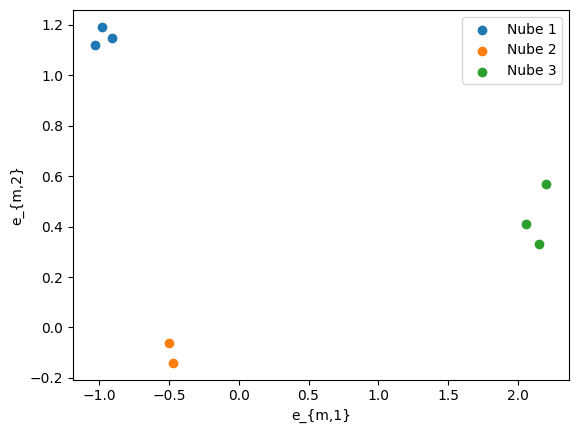

In [3]:
training_set,trainning_set_output = generate_samples([3,2,3], 2, 0.1)
# 1.2) Graficar nubes de puntos
def plot_samples(training_set, trainning_set_output):
    n_s = trainning_set_output.shape[1]
    for c in range(n_s):
        plt.scatter(training_set[trainning_set_output[:,c] == 1, 0], training_set[trainning_set_output[:,c] == 1, 1], label=f'Nube {c+1}')
    plt.xlabel('e_{m,1}')
    plt.ylabel('e_{m,2}')
    plt.legend()
    plt.show()

plot_samples(training_set, trainning_set_output)

## **Ejercicio 2**

1. Implemente un **perceptrón multicapa** con $n_e=2$ neuronas de entrada, una capa oculta de $n_o=2$ neuronas, y una capa de salida de $n_s=3$ neuronas. Recuerde, además, agregar las neuroas auxiliares que se utiliza para imitar los umbrales de activación. Utilice funciones de activación **sigmoideas**.

2. Entrenelo sobre el conjunto de ejemplos generado en el Ejercicio 1. Para entrenarlo, utilice una tasa $\eta=0.02$ y alrededor de 10.000 de épocas o más, según considere necesario.

3. Grafique el error $E$ en función del número de épocas de entrenamiento.

4. Luego, grafique nuevamente los puntos del Ejercicio 1, pintando el relleno de los mismos con los colores correspondiente a cada nube, y el borde de los mismos con el color correspondiente a la predicción obtenida con el **perceptrón multicapa**. Coinciden las predicciones con los colores originales?

5. Repita los experimentos con funciones de activación **ReLUs**. Que ocurre?

In [4]:
def forward_pass(x, w):
    """
    x: vector de entrada
    w: matriz de pesos
    """
    return np.dot(w, x)

In [36]:
# 1.1) implementar back propagation para entrenar una red neuronal con una capa oculta
def perceptron_multicapa(training_set, training_set_output, n_hidden, v_function, dv_function, g_function, dg_function, learning_rate=0.01, epochs=1000):
    """
    training_set: conjunto de entrenamiento de entrada (incluye el umbral).
    training_set_output: salida esperada para cada vector de entrenamiento.
    n_hidden: número de neuronas en la capa oculta.
    v_function: función de activación para la capa oculta.
    dv_function: derivada de la función de activación de la capa oculta.
    g_function: función de activación para la capa de salida.
    dg_function: derivada de la función de activación de la capa de salida.

    Retorna:
    - W: matriz de pesos de la capa de entrada a la capa oculta.
    - W_out: matriz de pesos de la capa oculta a la capa de salida.
    - ecm: error cuadrático medio para cada época.
    """
    n_e = training_set.shape[1]         # número de entradas (incluye umbral)
    n_s = training_set_output.shape[1]  # número de neuronas de salida
    n_h = n_hidden                      # número de neuronas en la capa oculta

    # Inicialización de los pesos
    W = np.random.normal(0, 1, (n_h, n_e))    # pesos de la capa de entrada a la capa oculta
    W_out = np.random.normal(0, 1, (n_s, n_h + 1)) # pesos de la capa oculta a la capa de salida (n_h + 1 para incluir el umbral)

    delta_W = np.zeros(W.shape)
    delta_W_out = np.zeros(W_out.shape)

    ecm = []
    for _ in tqdm(range(epochs)):
        delta_W.fill(0)
        delta_W_out.fill(0)

        ecm_epoch = 0

        for m in range(training_set.shape[0]):
            # calculo la salida de la capa oculta, no es necesario agregar el umbral porque se agrega en la capa de entrada
            v_m_raw = forward_pass(training_set[m], W)
            v_m = v_function(v_m_raw)
            # agrego el umbral a la salida de la capa oculta
            v_m = np.append(v_m, -1)
            # calculo la salida de la capa de salida
            O_m_raw = forward_pass(v_m, W_out)
            O_m = g_function(O_m_raw)

            # calculo primero el error de la capa de salida
            error_O = dg_function(O_m_raw) * (training_set_output[m] - O_m) # delta de aprendizaje para la capa de salida
            delta_W_out += np.outer(error_O, v_m)  # gradiente capa de salida

            ecm_epoch += np.sum((training_set_output[m] - O_m)**2)

            # calculo el error de la capa oculta
            error_v = dv_function(v_m_raw) * np.dot(W_out[:, :-1].T, error_O) # delta de la capa oculta
            delta_W += np.outer(error_v, training_set[m])                    # gradiente para W

        # Actualización de los pesos
        W -= learning_rate * delta_W
        W_out -= learning_rate * delta_W_out

        ecm.append(ecm_epoch * 0.5)
        
    return W, W_out, ecm

In [39]:
# entrenar un perceptron multicapa con 2 entradas, 2 ocultas y 3 salidas
training_set_ej2, training_set_output_ej2 = generate_samples([3,2,3], 2, 0.1)

W_1, W_out_1, ecm = perceptron_multicapa(training_set_ej2, training_set_output_ej2, 2, lambda x: x, lambda x: 1, lambda x: x, lambda x: 1, learning_rate=0.02,epochs=100000)

  0%|          | 0/100000 [00:00<?, ?it/s]/tmp/ipykernel_8563/3612856203.py:49: RuntimeWarning: overflow encountered in square
  ecm_epoch += np.sum((training_set_output[m] - O_m)**2)
/tmp/ipykernel_8563/3612856203.py:53: RuntimeWarning: invalid value encountered in add
  delta_W += np.outer(error_v, training_set[m])                    # gradiente para W
100%|██████████| 100000/100000 [00:21<00:00, 4583.11it/s]


[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]


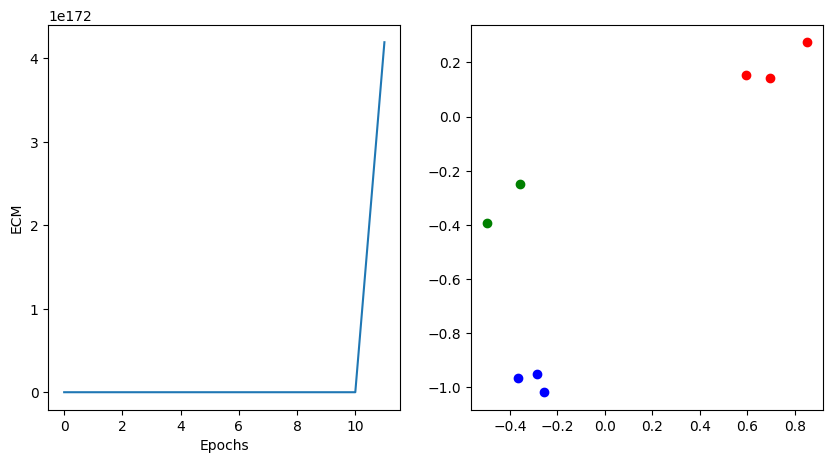

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# figura 1: ecm con las epcohs
ax[0].plot(ecm)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('ECM')

# figura 2: puntos de entrenamiento, color de la salida esperada y color de la salida obtenida (como un circulo sin relleno)
colors = ['red', 'green', 'blue']
hiden_layer = np.array([forward_pass(x, W_1) for x in training_set_ej2])
print(hiden_layer)
output = np.array([forward_pass(np.append(x, -1), W_out_1) for x in hiden_layer])
print(output)
for c in range(training_set_output_ej2.shape[1]):
    plt.scatter(training_set_ej2[training_set_output_ej2[:,c] == 1, 0], training_set_ej2[training_set_output_ej2[:,c] == 1, 1], color=colors[c], label=f'cat = {c+1}')
    plt.scatter(training_set_ej2[output[:,c] > 0, 0], training_set_ej2[output[:,c] > 0, 1], facecolors='none', edgecolors=colors[c])

plt.show()

In [8]:
def relu(x):
    return np.maximum(0, x)

def drelu(x):
    if x > 0:
        return 1
    return 0

In [ ]:
training_set_ej2_2, training_set_output_ej2_2 = generate_samples([3,2,3], 2, 0.1)

W_2, W_out_2, ecm = perceptron_multicapa(training_set_ej2_2, training_set_output_ej2_2, 2, relu, np.vectorize(drelu), relu, np.vectorize(drelu), learning_rate=0.02,epochs=500000)

100%|██████████| 500000/500000 [04:17<00:00, 1939.74it/s]


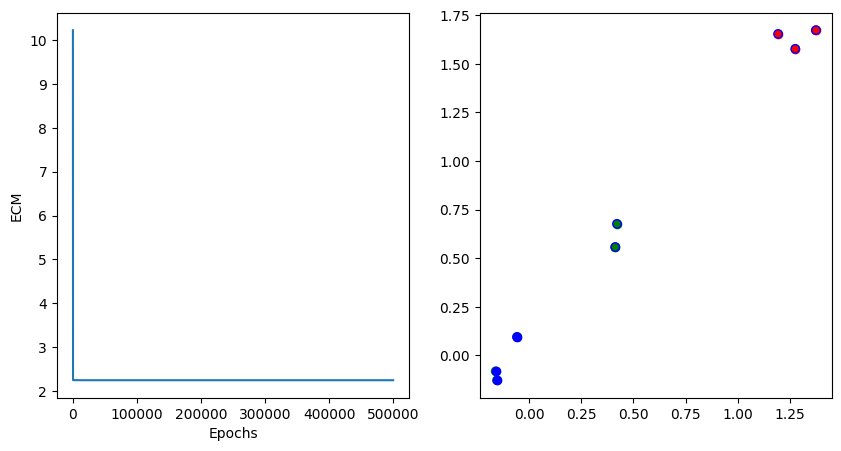

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# figura 1: ecm con las epcohs
ax[0].plot(ecm)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('ECM')

# figura 2: puntos de entrenamiento, color de la salida esperada y color de la salida obtenida (como un circulo sin relleno)
colors = ['red', 'green', 'blue']
hiden_layer = np.array([forward_pass(x, W_2) for x in training_set_ej2_2])
output = np.array([forward_pass(np.append(x, -1), W_out_2) for x in hiden_layer])
for c in range(training_set_output_ej2_2.shape[1]):
    plt.scatter(training_set_ej2_2[training_set_output_ej2_2[:,c] == 1, 0], training_set_ej2_2[training_set_output_ej2_2[:,c] == 1, 1], color=colors[c], label=f'cat = {c+1}')
    plt.scatter(training_set_ej2_2[output[:,c] > 0, 0], training_set_ej2_2[output[:,c] > 0, 1], facecolors='none', edgecolors=colors[c])

plt.show()



## **Ejercicio 3: la compuerta XOR**

1. Fabrique un dataset con el siguiente conjunto de 4 ejemplos:

    * $e_1 = (0,0)$, $s_1=(1,0)$
    * $e_2 = (0,1)$, $s_2=(0,1)$
    * $e_3 = (1,0)$, $s_3=(0,1)$
    * $e_4 = (1,1)$, $s_4=(1,0)$
    
  corresponde a la compuerta XOR.

2. Es el **perceptrón multicapa** capáz de aprender la compuerta XOR? Para responder esta pregunta, genere un **perceptrón multicapa** con $n_e=2$ neuronas de entrada, $n_o=2$ neuronas ocultas y $n_s=2$ neuronas de salida, y entrénelo utilizando el conjunto de ejemplos de la compuerta XOR.

3. Como se compara el **perceptrón multicapa** con el **perceptrón monocapa** sobre la compuerta XOR? Para responder esta otra pregunta, genere otro perceptrón "multicapa", pero esta vez utilizando solo dos capas, una de entrada con $n_e=2$ neuronas y una de salida con $n_s=2$ neuronas (de manera tal que en realidad es un perceptron monocapa), y repita el experimento anterior con los ejemplos de la compuerta XOR.

4. Repita los experimentos con funciones de activación **ReLUs**. Que ocurre?

In [11]:
# generar conjunto de entrenamiento de compuerta XOR
# 2 neuronas de entrada, 2 neuronas de salida
training_set_ej3 = np.array([[0,0,-1],
                             [0,1,-1],
                             [1,0,-1],
                             [1,1,-1]])
training_set_output_ej3 = np.array([[1,0],
                                    [0,1],
                                    [0,1],
                                    [1,0]])

In [19]:
w_3, w_out_3, ecm_3 = perceptron_multicapa(training_set_ej3, training_set_output_ej3, 2, lambda x: x, lambda x: 1, lambda x: x, lambda x: 1, learning_rate=0.02,epochs=100000)

100%|██████████| 100000/100000 [00:11<00:00, 8450.73it/s]


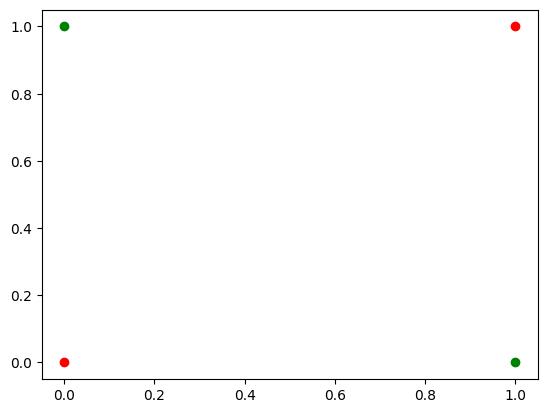

In [20]:
# grafico el resultado de el entrenamiento de una compuerta XOR

plt.scatter(training_set_ej3[training_set_output_ej3[:,0] == 1, 0], training_set_ej3[training_set_output_ej3[:,0] == 1, 1], color='red', label='cat = 1')
plt.scatter(training_set_ej3[training_set_output_ej3[:,1] == 1, 0], training_set_ej3[training_set_output_ej3[:,1] == 1, 1], color='green', label='cat = 2')


In [21]:
# entreno utilizando funciones RELU
w_4, w_out_4, ecm_4 = perceptron_multicapa(training_set_ej3, training_set_output_ej3, 2, relu, np.vectorize(drelu), relu, np.vectorize(drelu), learning_rate=0.02,epochs=100000)

100%|██████████| 100000/100000 [00:26<00:00, 3741.52it/s]
